# Case Study - Analyse the data of quarterly shipments transfer of a certain courier company in the $20^{th}$ century.

#### Basic Libraries import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Read the data in a quarterly Time Series Format.

In [2]:
df = pd.read_csv('ApplianceShipments.csv')
df.head()

,Quarter,Year,Shipments
0,Q1,1985,4009
1,Q2,1985,4321
2,Q3,1985,4224
3,Q4,1985,3944
4,Q1,1986,4123


In [3]:
date = pd.date_range(start='01/01/1985', end='01/01/1990', freq='Q')

In [4]:
df['Time_Stamp'] = date
df.head()

,Quarter,Year,Shipments,Time_Stamp
0,Q1,1985,4009,1985-03-31
1,Q2,1985,4321,1985-06-30
2,Q3,1985,4224,1985-09-30
3,Q4,1985,3944,1985-12-31
4,Q1,1986,4123,1986-03-31


In [8]:
df.set_index(keys='Time_Stamp',inplace=True,drop=True)
df.head()

,Quarter,Year,Shipments
Time_Stamp,,,
1985-03-31,Q1,1985,4009
1985-06-30,Q2,1985,4321
1985-09-30,Q3,1985,4224
1985-12-31,Q4,1985,3944
1986-03-31,Q1,1986,4123


In [10]:
df.drop(['Quarter','Year'],inplace=True,axis=1)
df.head()

,Shipments
Time_Stamp,
1985-03-31,4009
1985-06-30,4321
1985-09-30,4224
1985-12-31,3944
1986-03-31,4123


## 2. Plot the Time Series data.

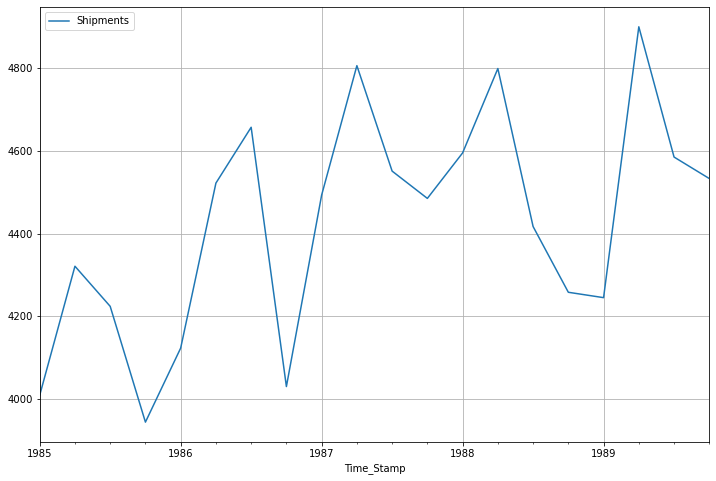

In [13]:
#Increase the figuresize
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot();
plt.grid();

## Find the basic measures of descriptive statistics for this time series across quarters of different years.

In [14]:
df.describe()

,Shipments
count,20.000000
mean,4424.850000
std,274.089358
min,3944.000000
25%,4239.750000
50%,4489.000000
75%,4587.500000
max,4900.000000


## 3. Plot the Time series along with the mean and median of the Time series in the graph to get an understanding of the fluctuation of the data from these two measures of central tendency.

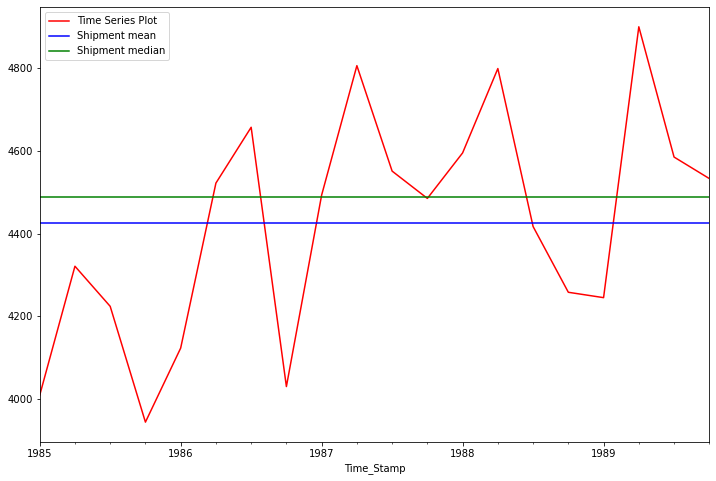

In [18]:
df.plot(color='Red');
plt.axhline(df['Shipments'].mean(),color='Blue');
plt.axhline(df['Shipments'].median(),color='Green');
plt.legend(['Time Series Plot','Shipment mean','Shipment median']);

## 4. Plot a quarterly comparison of the shipments using a barplot.

In [19]:
import seaborn as sns

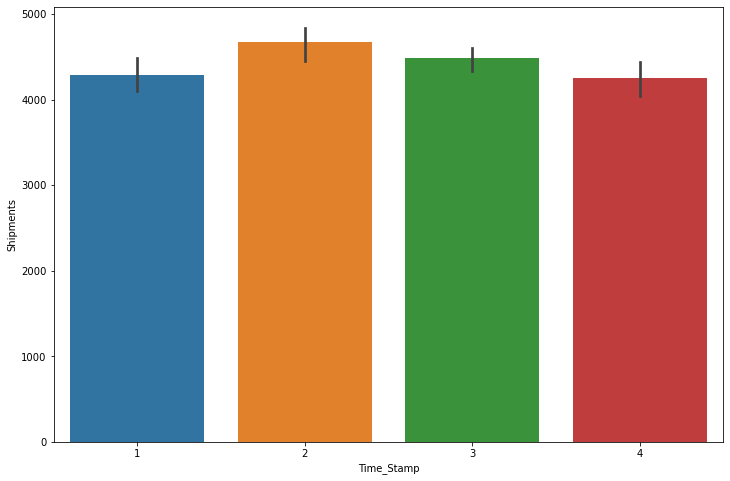

In [21]:
sns.barplot(x=df.index.quarter,y=df.Shipments,data=df);

## 5. Plot the year on year quarterly comparison of the shipments.

In [22]:
df.index.month_name

<bound method inherit_from_data.<locals>.method of DatetimeIndex(['1985-03-31', '1985-06-30', '1985-09-30', '1985-12-31',
               '1986-03-31', '1986-06-30', '1986-09-30', '1986-12-31',
               '1987-03-31', '1987-06-30', '1987-09-30', '1987-12-31',
               '1988-03-31', '1988-06-30', '1988-09-30', '1988-12-31',
               '1989-03-31', '1989-06-30', '1989-09-30', '1989-12-31'],
              dtype='datetime64[ns]', name='Time_Stamp', freq=None)>

In [26]:
quarterly_shipment = pd.pivot_table(df,values='Shipments',index=df.index.year,columns=df.index.month_name())
quarterly_shipment

Time_Stamp,December,June,March,September
Time_Stamp,,,,
1985,3944,4321,4009,4224
1986,4030,4522,4123,4657
1987,4485,4806,4493,4551
1988,4258,4799,4595,4417
1989,4533,4900,4245,4585


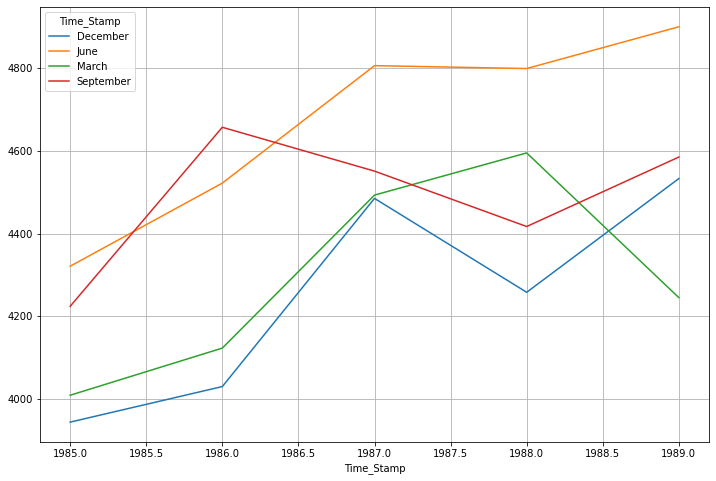

In [27]:
quarterly_shipment.plot();
plt.grid()

## 6. Plot the distribution plot for quarterly comparison of the shipments.

C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dines\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

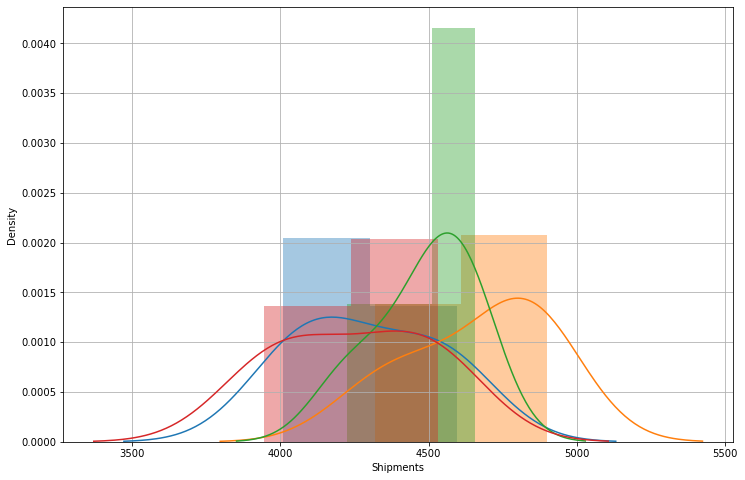

In [38]:
sns.distplot(df.loc[df.index.quarter == 1]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 2]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 3]['Shipments'])
sns.distplot(df.loc[df.index.quarter == 4]['Shipments'])
plt.grid();

## 7. Decompose the data and check the trend, seasonality and the irregular/residual/error component.

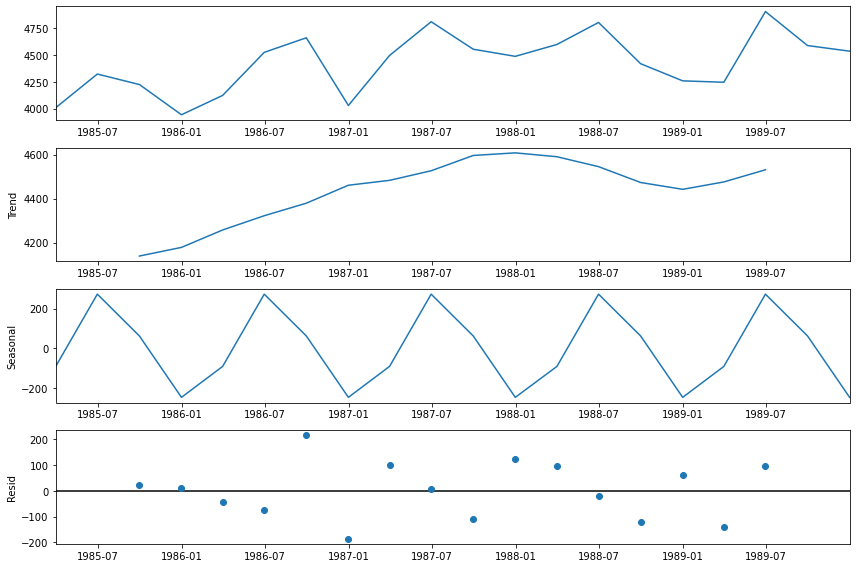

In [40]:
decompose = seasonal_decompose(df,model='additive')
decompose.plot();

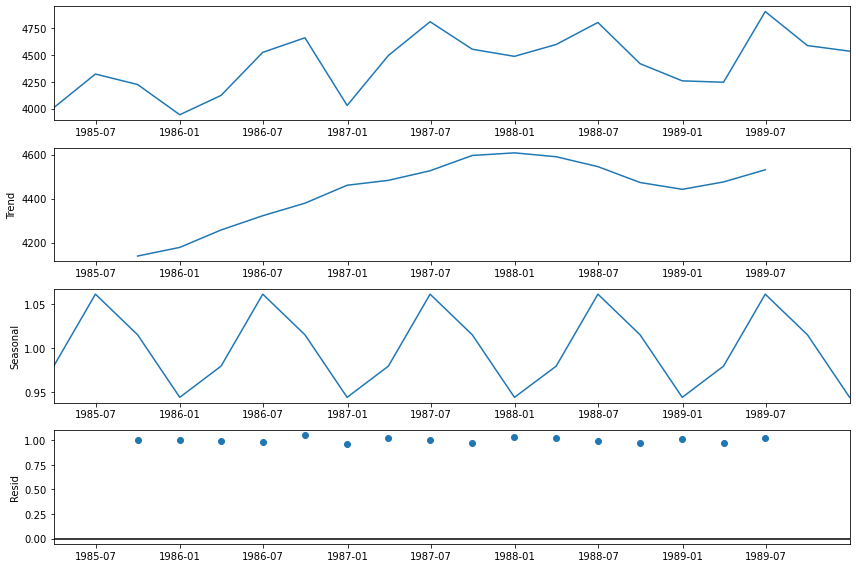

In [41]:
decompose = seasonal_decompose(df,model='multiplicative')
decompose.plot();

In [42]:
decompose.trend

Time_Stamp
1985-03-31         NaN
1985-06-30         NaN
1985-09-30    4138.750
1985-12-31    4178.125
1986-03-31    4257.375
1986-06-30    4322.250
1986-09-30    4379.250
1986-12-31    4461.000
1987-03-31    4483.250
1987-06-30    4526.875
1987-09-30    4596.500
1987-12-31    4608.375
1988-03-31    4590.750
1988-06-30    4545.625
1988-09-30    4473.500
1988-12-31    4442.375
1989-03-31    4476.000
1989-06-30    4531.375
1989-09-30         NaN
1989-12-31         NaN
Name: trend, dtype: float64

In [43]:
decompose.seasonal

Time_Stamp
1985-03-31    0.979648
1985-06-30    1.060879
1985-09-30    1.015027
1985-12-31    0.944446
1986-03-31    0.979648
1986-06-30    1.060879
1986-09-30    1.015027
1986-12-31    0.944446
1987-03-31    0.979648
1987-06-30    1.060879
1987-09-30    1.015027
1987-12-31    0.944446
1988-03-31    0.979648
1988-06-30    1.060879
1988-09-30    1.015027
1988-12-31    0.944446
1989-03-31    0.979648
1989-06-30    1.060879
1989-09-30    1.015027
1989-12-31    0.944446
Name: seasonal, dtype: float64

In [44]:
decompose.resid

Time_Stamp
1985-03-31         NaN
1985-06-30         NaN
1985-09-30    1.005489
1985-12-31    0.999490
1986-03-31    0.988556
1986-06-30    0.986177
1986-09-30    1.047681
1986-12-31    0.956524
1987-03-31    1.022995
1987-06-30    1.000736
1987-09-30    0.975443
1987-12-31    1.030475
1988-03-31    1.021720
1988-06-30    0.995156
1988-09-30    0.972753
1988-12-31    1.014877
1989-03-31    0.968094
1989-06-30    1.019296
1989-09-30         NaN
1989-12-31         NaN
Name: resid, dtype: float64

Go ahead and play around with the data to understand the nuances. Try to perform different types of visualizations in order for better understanding of the data. 

Happy Learning!

# END